In [153]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import cellcharter as cc
import scvi
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns   

In [3]:
adata = sc.read_h5ad('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/figures/Fig6/Fig6.7/data/WT_Mut_catalyst_proseg_prior_expan5um_raw_noBoundary_lowTranscriptLeidenClusterRemoved_Nov25_p46_neuronal_cells_removed_banksy.h5ad')
myeloid_adata = sc.read_h5ad('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/pipelines/xenium/local/neighborhoods/data/myeloid_subcluster_adata.h5ad')
myeloid_adata = myeloid_adata[myeloid_adata.obs['leiden']!='6'] # remove cluster 6, which looks like cycling cells
myeloid_adata.obs['cell_type_2'] = np.where(
    myeloid_adata.obs['leiden']=='0',
    'Microglial inflammatory',
    np.where(myeloid_adata.obs['leiden'].isin(['2', '4']), 'Scavenger immunosuppressive', 'Other'))

adata.obs['myeloid_subcluster'] = adata.obs.index.map(myeloid_adata.obs['leiden'])
adata.obs['myeloid_subcluster_2'] = adata.obs.index.map(myeloid_adata.obs['cell_type_2'])
plot_dir = '/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/figures/Fig6/Fig6.7/plot'

/var/folders/xc/nsnyygq95xq2nw5mj137xz040000gq/T/ipykernel_2980/1120351156.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myeloid_adata.obs['cell_type_2'] = np.where(


In [5]:
cell_type_colors = {
        'AC-like': "#92B0C6", #(soft sky blue)
        'OPC-like': "#F1A340", #(desaturated blue-gray)
        'Myeloid': "#D3A5C8", #(muted mauve)
        'MES-like': "#D9735A", #(burnt coral for stronger contrast)
        'Oligodendrocyte': "#9F5F80", #(muted plum to distinguish from MES-like)
        'Pericyte': "#B0408A", #(soft mustard yellow)
        'Cycling': "#A69AB2", # (muted lavender)
        'Endothelial': "#DD51AD", # (pale mint green)
        'Excitatory neuron': "#D6D2C4", #(muted beige)
        'T cell': "#89A970", #(soft olive green)
        'Inhibitory neuron': "#656565", # (medium gray)
        # 'Other': "#808080"  # Gray for 'Other'
    }
# spagcn_color
banksy_nhood_colors = {
        'AC-like': "#92B0C6", #(soft sky blue)
        'OPC-like': "#F1A340", #(desaturated blue-gray)
        'Myeloid': "#D3A5C8", #(muted mauve)
        'MES-like': "#D9735A", #(burnt coral for stronger contrast)
        'Oligodendrocyte': "#9F5F80", #(muted plum to distinguish from MES-like)
        'Vascular': "#DD51AD", #(soft mustard yellow)
        'Neuron': "#D6D2C4", #(muted beige)
        'T cell/Pericyte': "#89A970", #(soft olive green)
        'Mix': "#808080"  # Gray for 'Other'
    }

import sys
sys.path.append('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/Projects-AkdemirLab/pipelines/Banksy_py')
from banksy_utils.color_lists import spagcn_color

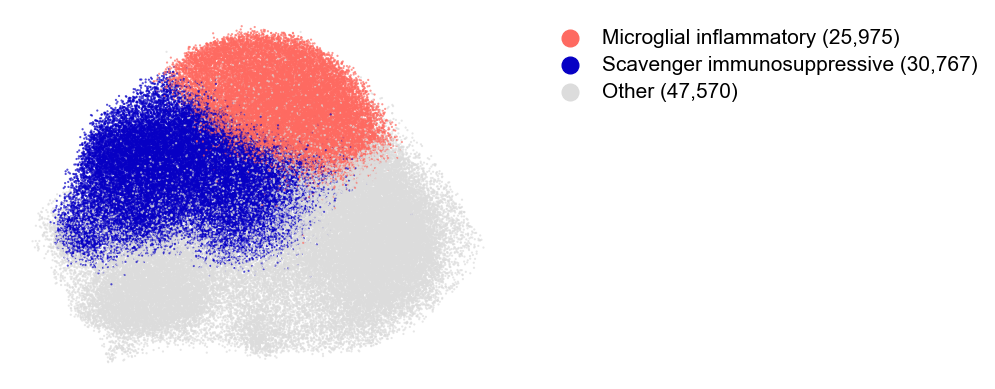

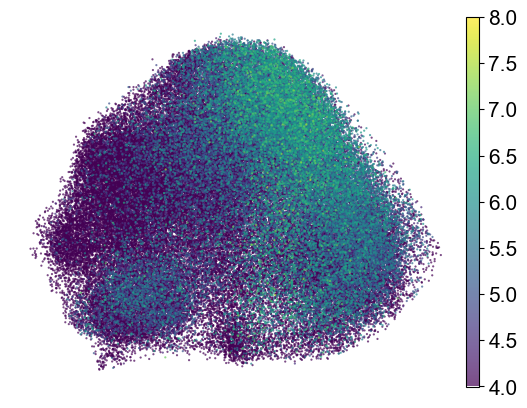

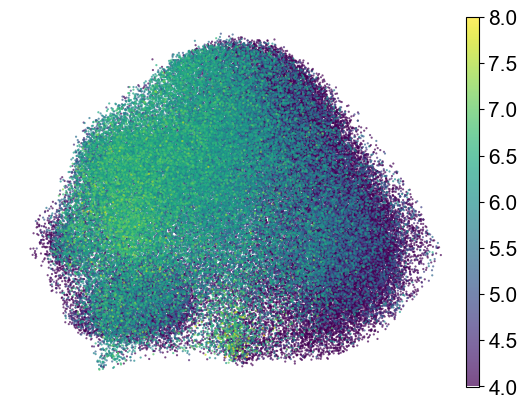

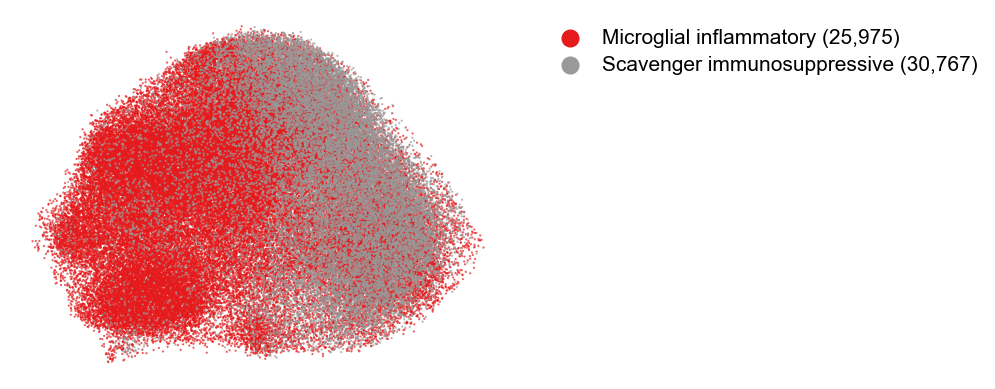

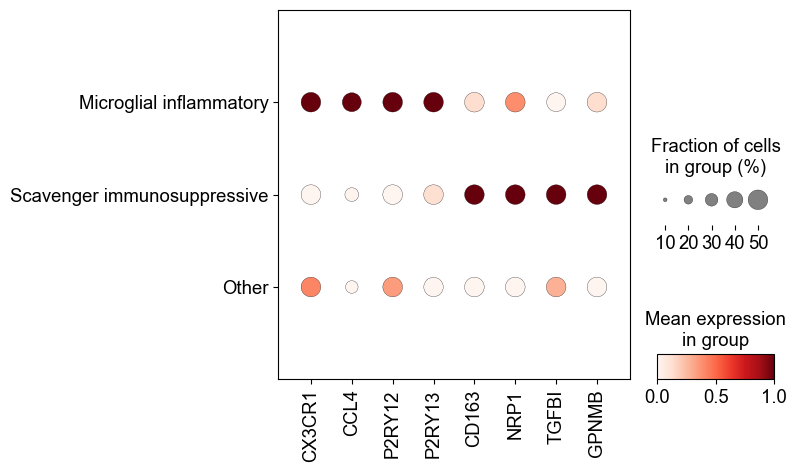

In [9]:
## subclustering Myeloid cells

myeloid_colors = {
    'Microglial inflammatory': '#FE6A61',  # burnt coral
    'Scavenger immunosuppressive': '#0700C4',  # soft sky blue
    'Other': '#DCDCDC'  # gray
}

myeloid_adata.obs['idh_3'] = np.where(myeloid_adata.obs['idh']=='WT','WT','Mut')
myeloid_adata.obs['idh_3'] = pd.Categorical(
    myeloid_adata.obs['idh_3'], 
    categories=['WT', 'Mut']
)
## plot cell type
myeloid_adata.obs['cell_type_2'] = pd.Categorical(
    myeloid_adata.obs['cell_type_2'], 
    categories=['Microglial inflammatory', 'Scavenger immunosuppressive', 'Other']
)

def plot_myeloid_cell_types(color_column, savefig=False):
    plt.rcParams.update({'font.family': 'Arial', 'font.size': 15})

    fig, ax = plt.subplots()
    if color_column in myeloid_adata.obs.columns:
        if color_column=='cell_type_2':
            cmap = myeloid_colors.copy()
        else:
            cmap = 'Set1'

        sc.pl.umap(
            myeloid_adata, 
            color=color_column, 
            s=10, 
            alpha=0.7, 
            ax=ax, 
            show=False, 
            palette=cmap, 
            frameon=False
        )
        legend = ax.get_legend()
        handles, labels = ax.get_legend_handles_labels()
        labels = ['Microglial inflammatory (25,975)', 'Scavenger immunosuppressive (30,767)', 'Other (47,570)']
        legend.remove()  # Remove the original legend
        ax.legend(
            handles, 
            labels, 
            bbox_to_anchor=(1.05, 1), 
            frameon=False, 
            handletextpad=0.5,  # Horizontal spacing between marker and text
            labelspacing=0.4,  # Vertical spacing between legend entries
            markerscale=2.0  # Size of the legend marker
        ) 
    else:
        sc.pl.umap(
            myeloid_adata, 
            color=color_column, 
            s=10, 
            alpha=0.7, 
            ax=ax, 
            show=False, 
            cmap='viridis', 
            frameon=False,
            vmin=4,
            vmax=8
        )

  # Pass the axis and disable automatic display
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')

 # Create a new legend with scaled markers and increased distance between markers and text
    if savefig:
        plt.savefig(f'{plot_dir}/{color_column}.png', dpi=300, bbox_inches='tight')

# Example usage:
plot_myeloid_cell_types('cell_type_2', savefig=True)
plot_myeloid_cell_types('CX3CR1', savefig=True)
plot_myeloid_cell_types('CD163', savefig=True)
plot_myeloid_cell_types('idh_3', savefig=True)

plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})

fig, ax= plt.subplots()
sc.pl.dotplot(
    myeloid_adata, 
    var_names=['CX3CR1', 'CCL4', 'P2RY12', 'P2RY13', 'CD163', 'NRP1', 'TGFBI', 'GPNMB'], 
    groupby='cell_type_2',
    color_map='Reds',
    dot_max=0.5,
    dot_min=0.05,
    standard_scale='var',
    dendrogram=False,
    figsize=(6, 4),
    ax=ax
    # swap_axes=True,  # Rotate the plot
    # show=False
)
fig.savefig(f'{plot_dir}/myeloid_markers_dotplot.png', dpi=300, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Scavenger immunosuppressive_WT vs. Scavenger immunosuppressive_Mut: Mann-Whitney-Wilcoxon test two-sided, P_val:1.758e-06 U_stat=3.200e+02
Microglial inflammatory_WT vs. Microglial inflammatory_Mut: Mann-Whitney-Wilcoxon test two-sided, P_val:7.897e-04 U_stat=5.600e+01
Microglial inflammatory_WT vs. Scavenger immunosuppressive_WT: Mann-Whitney-Wilcoxon test two-sided, P_val:1.512e-02 U_stat=1.380e+02
Microglial inflammatory_Mut vs. Scavenger immunosuppressive_Mut: Mann-Whitney-Wilcoxon test two-sided, P_val:3.392e-06 U_stat=2.250e+02


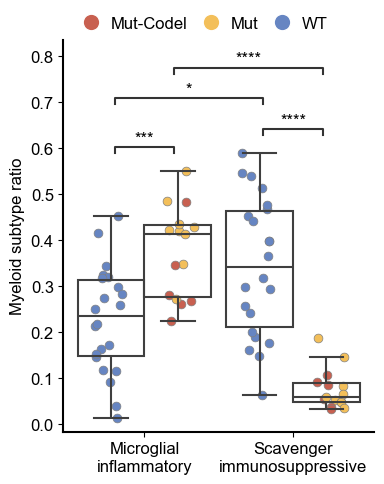

In [423]:
import seaborn as sns
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt

# Define your color palette first
idh_colors = {'Mut-Codel':'#C86050', 'Mut':'#F3BF5A', 'WT':'#6685c2'}

total_counts = myeloid_adata.obs.groupby('sample_2').size()
cluster_counts1 = myeloid_adata.obs[myeloid_adata.obs['cell_type_2'] == 'Microglial inflammatory'].groupby('sample_2').size()
normalized_counts1 = cluster_counts1 / total_counts
df1 = normalized_counts1.to_frame().reset_index().rename(columns={'sample_2':'sample', 0:'Microglial inflammatory'})

cluster_counts2 = myeloid_adata.obs[myeloid_adata.obs['cell_type_2'] == 'Scavenger immunosuppressive'].groupby('sample_2').size()
normalized_counts2 = cluster_counts2 / total_counts
df2 = normalized_counts2.to_frame().reset_index().rename(columns={'sample_2':'sample',0:'Scavenger immunosuppressive'})

merged_df = pd.merge(df1, df2, on='sample', how='outer').set_index('sample')
adata.obs['idh_3'] = np.where(adata.obs['idh']=='WT', 'WT', 'Mut')
merged_df['group'] = merged_df.index.map(adata.obs[['sample_2', 'idh_3']].set_index('sample_2').to_dict()['idh_3'])
merged_df['group_2'] = merged_df.index.map(adata.obs[['sample_2', 'idh']].set_index('sample_2').to_dict()['idh'])

melted_df = merged_df.melt(id_vars=['group', 'group_2'], var_name='cluster', value_name='ratio')
melted_df['group'] = pd.Categorical(
    melted_df['group'],
    categories=['WT', 'Mut']
)
# Create a mapping from group to group_2 colors
# First create a boxplot
plt.figure(figsize=(4,5))
sns.boxplot(data=melted_df, x='cluster', y='ratio', hue='group', showfliers=False, boxprops=dict(facecolor='none'), linewidth=1.5, width=0.9)

# Now we'll create a custom stripplot
for cluster_idx, cluster_name in enumerate(['Microglial inflammatory', 'Scavenger immunosuppressive']):
    for group_idx, group_name in enumerate(['WT', 'Mut']):
        # Filter data for this cluster and group
        subset = melted_df[(melted_df['cluster'] == cluster_name) & (melted_df['group'] == group_name)]
        
        # Get x position with dodge
        x_pos = cluster_idx + (0.25 if group_idx == 1 else -0.25)
        
        # Plot points with colors based on group_2
        for _, row in subset.iterrows():
            plt.scatter(
                x=x_pos + np.random.uniform(-0.1, 0.1),  # Add jitter
                y=row['ratio'],
                color=idh_colors[row['group_2']],  # Color by group_2
                alpha=1,
                edgecolor='gray',
                linewidth=0.5,
                s=40  # Size of the marker
            )

# Add statistical annotations
pairs = [(('Microglial inflammatory', 'Mut'), ('Microglial inflammatory', 'WT')),
 (('Scavenger immunosuppressive', 'Mut'), ('Scavenger immunosuppressive', 'WT')),
 (('Microglial inflammatory', 'WT'), ('Scavenger immunosuppressive', 'WT')),
 (('Microglial inflammatory', 'Mut'), ('Scavenger immunosuppressive', 'Mut'))]
annotator = Annotator(plt.gca(), pairs, data=melted_df, x='cluster', y='ratio', hue='group')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', verbose=2, fontsize=12)
annotator.apply_and_annotate()

# Create a custom legend for group_2 colors
from matplotlib.lines import Line2D
custom_legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=idh_colors[k], 
           markersize=8, label=k) for k in idh_colors.keys()
]
plt.legend(handles=custom_legend_elements, title='', bbox_to_anchor=(0.9, 1.1), 
          ncol=3, frameon=False, markerscale=1.5, columnspacing=1, 
          handlelength=0.8, handleheight=0.8)

plt.xlabel('')
plt.ylabel('Myeloid subtype ratio')
plt.xticks(ticks=[0, 1], labels=['Microglial\ninflammatory', 'Scavenger\nimmunosuppressive'], fontsize=12)
sns.despine()
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.tight_layout()
plt.savefig(f"{plot_dir}/microglial_scavenger_ratios.png", dpi=300, bbox_inches='tight')
plt.show()

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 7.5 mm
Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..


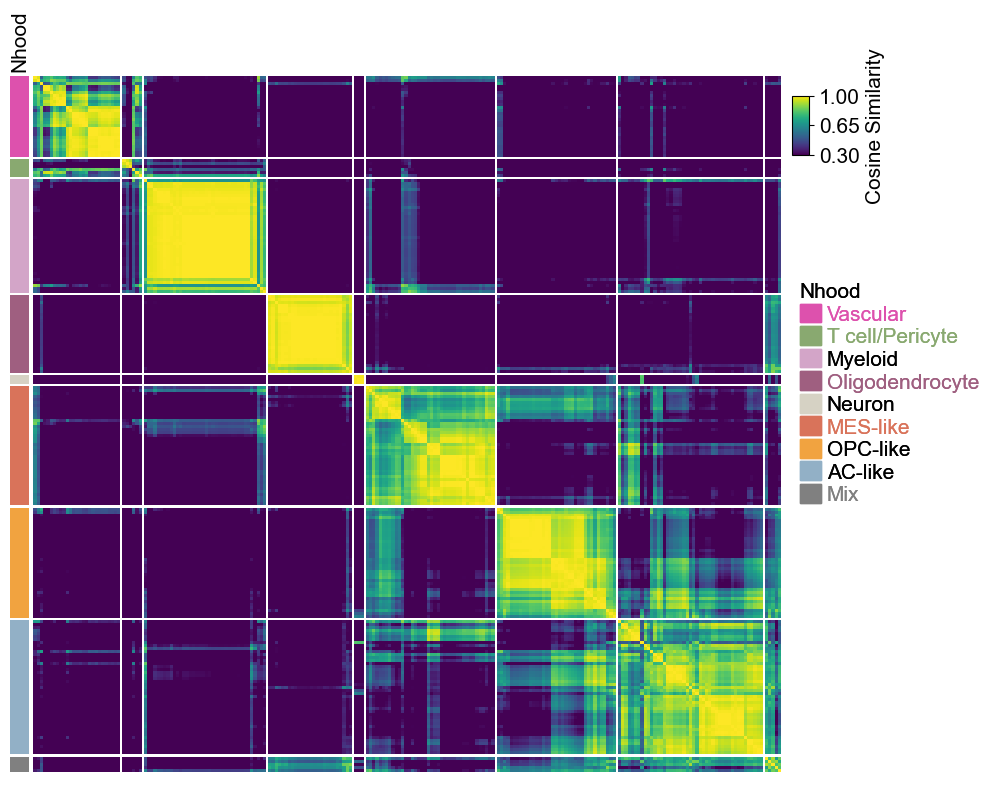

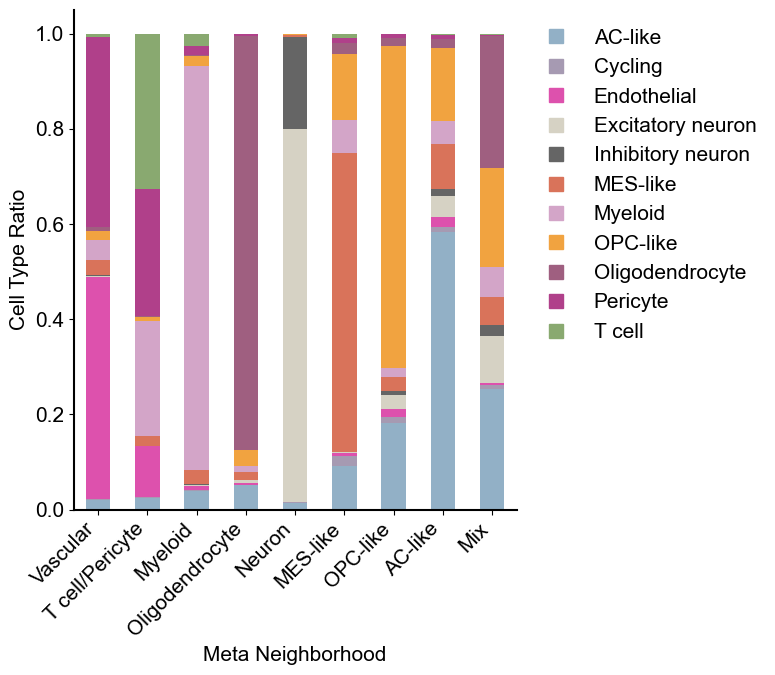

In [364]:
##########################################################################
## hierarchical clustering of banksy neighborhoods by cell type ratios
##########################################################################
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from scipy.cluster.hierarchy import fcluster
import PyComplexHeatmap as pch
import matplotlib.pyplot as plt
import random
random.seed(1234)
import numpy as np
np.random.seed(1234)
import warnings
warnings.filterwarnings('ignore')

nhood_order = ['Vascular', 'T cell/Pericyte', 'Myeloid', 'Oligodendrocyte','Neuron','MES-like','OPC-like','AC-like','Mix']

def calculate_nhood_ratios(bdata, nhood_key, cell_type_key='cell_type_final'):
    """
    Calculate the cell type ratio for each neighborhood.
    """
    nhood_ratios = bdata.obs.groupby(['sample_2', nhood_key])[cell_type_key].value_counts(normalize=True).unstack(fill_value=0)
    return nhood_ratios

def plot_cosine_similarity_and_cut(nhood_ratios, n_split):
    """
    Plot the cosine similarity matrix for neighborhood ratios and cut into clusters.
    """
    cosine_sim = cosine_similarity(nhood_ratios)
    cosin_sim_df = pd.DataFrame(cosine_sim, index=nhood_ratios.index, columns=nhood_ratios.index)
    # row_ha = pch.HeatmapAnnotation(df=nhood_ratios, cmap=cell_type_colors)
    hp1 = pch.ClusterMapPlotter(cosin_sim_df,
                  row_cluster=True, 
                  col_cluster=True,
                  show_rownames=False,
                  cmap='viridis',
                  row_split=n_split,
                  label='PCC',
                  vmin=0.3)
    plt.close()

    ordered_nhoods = [item for sublist in hp1.row_order for item in sublist]
    nhoods = [str(i) for i, sublist in enumerate(hp1.row_order) for _ in sublist]
    # Ensure lengths match
    if len(ordered_nhoods) != len(nhoods):
        raise ValueError("Mismatch in lengths of ordered_nhoods and nhoods.")
    cluster_df = pd.DataFrame({'cluster': nhoods}, index=ordered_nhoods)
    cluster_df['nhood_name']= cluster_df['cluster'].map({
        '0':'Vascular', 
        '1':'T cell/Pericyte', 
        '2':'Myeloid', 
        '3':'Oligodendrocyte',
        '4':'Neuron',
        '5':'MES-like',
        '6':'OPC-like',
        '7':'AC-like',
        '8':'Mix'})
    cluster_df['nhood_name'] = pd.Categorical(cluster_df['nhood_name'], categories=nhood_order, ordered=True)

    plt.figure(figsize=(10,8))
    banksy_nhood_colors2 = {
        'Vascular': "#DD51AD", #(soft mustard yellow), 
        'T cell/Pericyte': "#89A970", #(soft olive green)
        'Myeloid': "#D3A5C8", #(muted mauve)
        'Oligodendrocyte': "#9F5F80", #(muted plum to distinguish from MES-like)
        'Neuron': "#D6D2C4", #(muted beige)
        'MES-like': "#D9735A", #(burnt coral for stronger contrast)
        'OPC-like': "#F1A340", #(desaturated blue-gray)
        'AC-like': "#92B0C6", #(soft sky blue)
        'Mix': "#808080"  # Gray for 'Other'
    }
    row_ha = pch.HeatmapAnnotation(Nhood =pch.anno_simple(cluster_df['nhood_name'], 
                                                    legend=True,
                                                    height=5, 
                                                    colors=banksy_nhood_colors2,
                                                    legend_kws={'frameon':False}, 
                                                    rasterized=True),
                                                    axis=0)
    hp2 = pch.ClusterMapPlotter(cosin_sim_df,
            left_annotation=row_ha,
              row_cluster=True, 
              col_cluster=True,
              show_rownames=False,
              cmap='viridis',
              row_split=cluster_df.cluster,
              col_split=cluster_df.cluster,
              col_split_gap=0.5,
              row_split_gap=0.5,
              legend=True,
              label='Cosine Similarity',
              legend_width=50,
              legend_gap=30,
              vmin=0.3)
    hp2.cbars[0]
    plt.savefig(f"{plot_dir}/cosine_similarity_heatmap.png", dpi=300, bbox_inches='tight')
    plt.show()
    return cluster_df

def plot_cluster_cell_type_ratios(nhood_ratios, cluster_assignments):
    """
    Plot the cell type ratio for each cluster.
    """
    nhood_ratios = pd.merge(nhood_ratios.reset_index(), cluster_assignments.reset_index(), left_on='index', right_on='index').set_index('index')
    cluster_ratios = nhood_ratios.groupby('nhood_name').mean()
    cluster_ratios = cluster_ratios.loc[nhood_order] # reorder the columns
    ax = cluster_ratios.plot(kind='bar', stacked=True, figsize=(8,7), color=cell_type_colors)
    plt.title('')
    plt.xlabel('Meta Neighborhood')
    plt.ylabel('Cell Type Ratio')
    
    # Get the original legend handles and labels
    handles, labels = ax.get_legend_handles_labels()
    # Create new square marker legend handles
    from matplotlib.lines import Line2D
    new_handles = []
    # For each original handle, create a square marker with the same color
    for i, label in enumerate(labels):
        color = cell_type_colors.get(label, 'gray')  # Default to gray if not found
        new_handles.append(Line2D([0], [0], marker='s', color=color, 
                          markersize=10, linewidth=0))
    # Create legend with square markers
    legend = plt.legend(new_handles, labels, title='', 
                       bbox_to_anchor=(1, 1), loc='upper left', frameon=False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f"{plot_dir}/cluster_cell_type_ratios.png", dpi=300, bbox_inches='tight')
    plt.show()

# Calculate and plot for banksy_nhood
plt.rcParams.update({'font.family': 'Arial', 'font.size': 15})
banksy_ratios = calculate_nhood_ratios(adata, 'banksy_nhood')
banksy_ratios = banksy_ratios.loc[~(banksy_ratios == 0).all(axis=1)]
banksy_ratios.index = banksy_ratios.index.map(lambda x: f"{x[0]}_{x[1]}")
banksy_clusters = plot_cosine_similarity_and_cut(banksy_ratios, n_split=9)
plot_cluster_cell_type_ratios(banksy_ratios, banksy_clusters.drop(columns=['cluster']))


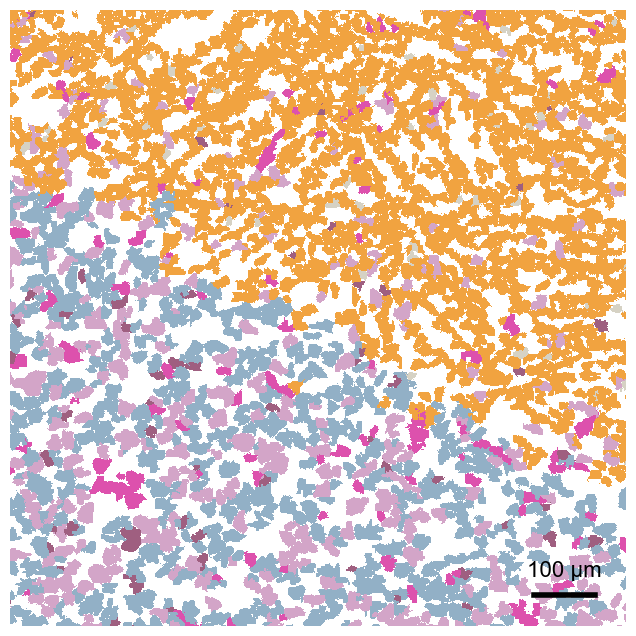

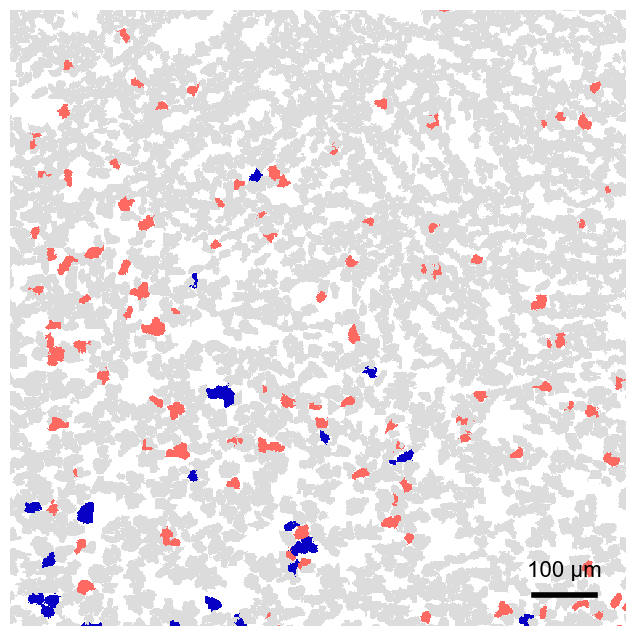

In [438]:
### plot p43P
import gzip
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_p43P(plot_key='cell_type_final', sample='p43P', color_map = cell_type_colors, bbox=None, figsize=10, legend=False, savefig=False, ax=None):
    ''' 
    bboxes: list of bbox [xmin, xmax, ymin, ymax]
    '''
    samples_matching_dict = adata.obs[['sample', 'sample_2']].drop_duplicates('sample').set_index('sample_2').to_dict()['sample']
    proseg_dir = '/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/data/processed/xenium/expan5um/proseg'
    with gzip.open(f'{proseg_dir}/{samples_matching_dict[sample]}/cell-polygons.geojson.gz', 'rb') as f:
        gdf = gpd.read_file(f)
    gdf['cell'] = gdf['cell'].astype('str')
    gdf['cell_id'] = [sample + '_' + x for x in gdf['cell']]
    tmp_adata = adata[adata.obs['sample_2'] == sample]
    gdf = gdf.merge(tmp_adata.obs.reset_index(), on='cell_id', how='inner')

    if gdf[plot_key].isna().any():
        gdf['color'] = gdf[plot_key].map(color_map).fillna('#DCDCDC')
    else:
        gdf['color'] = gdf[plot_key].map(color_map)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(figsize, figsize))
    gdf.plot(column=plot_key, aspect=1, color=gdf['color'], ax=ax)

    # Add a 100μm scale bar
    scale_bar_length = 100  # Length of the scale bar in μm
    scale_bar_x = bbox[1] - scale_bar_length - 50  # X position of the scale bar
    scale_bar_y = bbox[3] - 50  # Y position of the scale bar
    ax.plot([scale_bar_x, scale_bar_x + scale_bar_length], [scale_bar_y, scale_bar_y], color='black', lw=4)
    ax.text(scale_bar_x + scale_bar_length / 2, scale_bar_y - 40, f'{scale_bar_length} μm', 
            color='black', ha='center', va='center', fontsize=16)
    
    ax.set_aspect('equal')
    if bbox is not None:
        ax.set_xlim(bbox[0], bbox[1])
        ax.set_ylim(bbox[2], bbox[3])

    if legend:
        # Create custom legend with dots
        handles, labels = [], []
        for cell_type, color in color_map.items():
            handles.append(mpl.lines.Line2D([0], [0], marker='o', markerfacecolor=color, markersize=15, label=cell_type, markeredgewidth=0, linestyle='None', markeredgecolor='none'))
            labels.append(cell_type)
        ax.legend(handles=handles, bbox_to_anchor=(1.7, 1), frameon=False,
              handletextpad=2,  # Increase space between marker and text
              borderpad=1.5,     # Add space inside the legend box
              markerscale=0.8)  # Adjust marker size within legend
        
    ax.invert_yaxis()
    ax.axis('off')

    # Save figure if required
    if savefig:
        fig.savefig(f"{plot_dir}/{plot_key}_spatial_plot.png", dpi=300, bbox_inches='tight')

# fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# plot_p43P(plot_key = 'banksy_meta_cluster2', color_map=banksy_nhood_colors, 
#           bbox=[2000, 3000, 850, 1750], 
#           ax=axes[0],
#           figsize=8, legend=True)

# plot_p43P(plot_key='myeloid_subcluster_2', color_map=myeloid_colors, 
#           bbox=[2000, 3000, 850, 1750], 
#           ax=axes[1],
#           figsize=8, legend=True)
# plt.subplots_adjust(wspace=0.1)
# plt.savefig(f"{plot_dir}/p43P_myeloid_banksy.png", dpi=300, bbox_inches='tight')
plot_p43P(plot_key = 'banksy_meta_cluster2', color_map=banksy_nhood_colors, 
          bbox=[1800, 2800, 750, 1750], 
          figsize=8, legend=False, savefig=True)
plot_p43P(plot_key='myeloid_subcluster_2', color_map=myeloid_colors,
          bbox=[1800, 2800, 750, 1750], 
          figsize=8, legend=False, savefig=True)